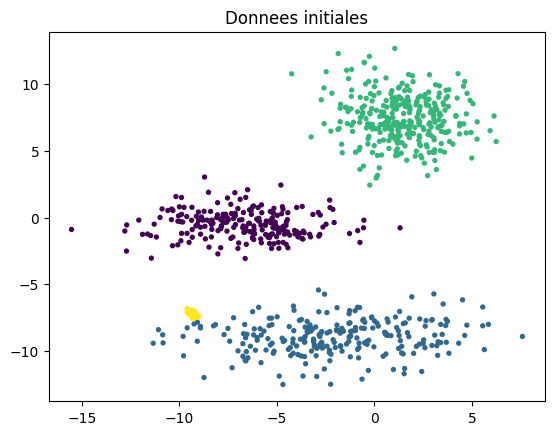

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
# Parser un fichier de donnees au format arff
# data est un tableau d'exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
# path = "./dataset/2d-4c.arff"
path = "./dataset/2d-4c-no9.arff"
# path = "./dataset/donut3.arff"
# path = "./dataset/tetra.arff"
# path = "./dataset/3-spiral.arff"
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])
ground_truth = np.array([x[2] for x in databrut[0]])
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:, 0] # tous les elements de la premiere colonne
f1 = datanp[:, 1] # tous les elements de la deuxieme colonne
plt.scatter(f0, f1, c = ground_truth, s=8)
plt.title("Donnees initiales")
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn import cluster
from sklearn import metrics

def k_means(data_path, k=2):
    databrut = arff.loadarff(open(data_path, 'r'))
    datanp = np.array([[x[0], x[1]] for x in databrut[0]])
    ground_truth = np.array([x[2] for x in databrut[0]])
    f0 = datanp[:, 0] # tous les elements de la premiere colonne
    f1 = datanp[:, 1] # tous les elements de la deuxieme colonne
    plt.scatter(f0, f1, c = ground_truth, s=8)
    plt.title("Donnees initiales")
    plt.show()

    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='random', random_state=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
    print("Silhouette score :", silhouette_score)
    davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
    print("Davies_bouldin score :", davies_bouldin_score)
    calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
    print("calinski_harabasz score :", calinski_harabasz_score)

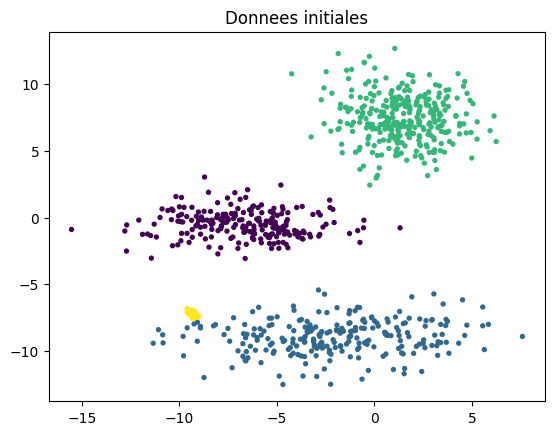

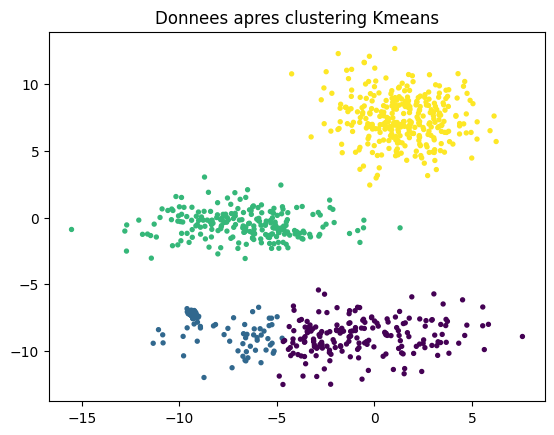

nb clusters = 4 , nb iter = 5 , runtime = 13.37 ms
Silhouette score : 0.6410098765494229
Davies_bouldin score : 0.49338851730063016
calinski_harabasz score : 2775.6685110655926


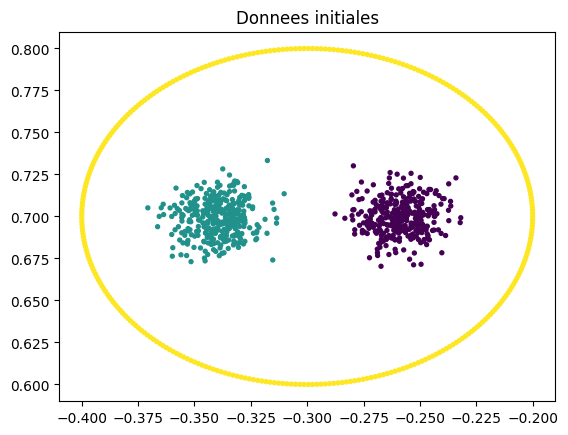

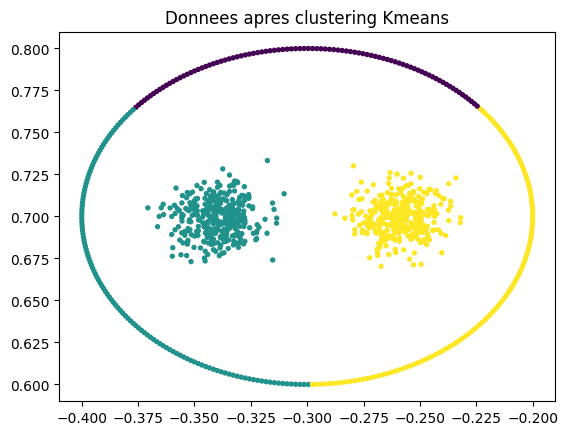

nb clusters = 3 , nb iter = 4 , runtime = 14.43 ms
Silhouette score : 0.562751140280719
Davies_bouldin score : 0.6729970525189101
calinski_harabasz score : 931.5324859948547


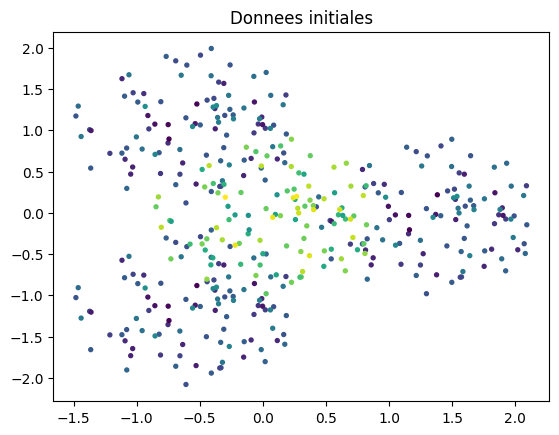

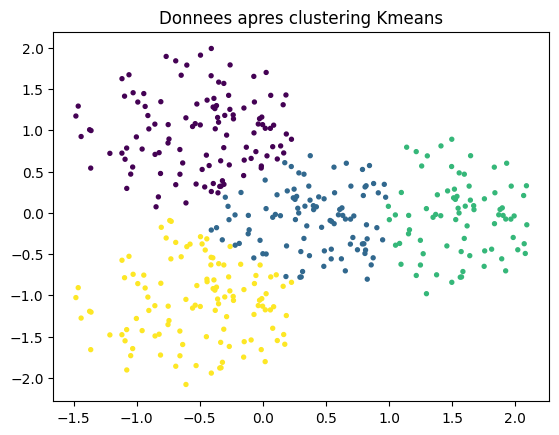

nb clusters = 4 , nb iter = 13 , runtime = 18.66 ms
Silhouette score : 0.41941227532407427
Davies_bouldin score : 0.7932572271453546
calinski_harabasz score : 488.37624124104815


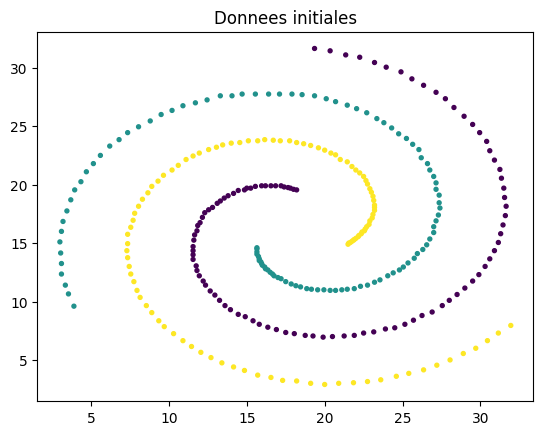

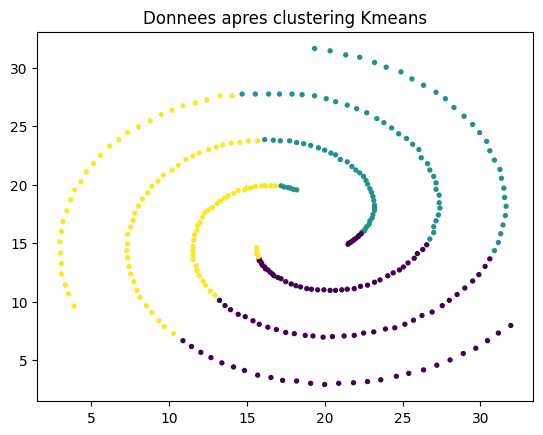

nb clusters = 3 , nb iter = 11 , runtime = 22.92 ms
Silhouette score : 0.3608943177577447
Davies_bouldin score : 0.8874106094613804
calinski_harabasz score : 238.04612727332426


In [4]:
k_means("./dataset/2d-4c-no9.arff", k=4)
k_means("./dataset/donut3.arff", k=3)
k_means("./dataset/tetra.arff", k=4)
k_means("./dataset/3-spiral.arff", k=3)

Appel KMeans pour une valeur fixee de k 


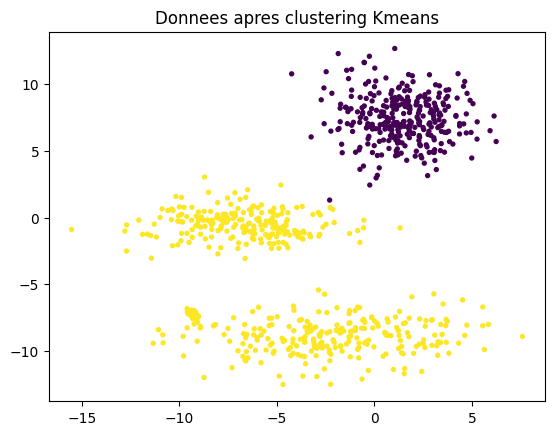

nb clusters = 2 , nb iter = 4 , runtime = 101.12 ms
Silhouette score : 0.605567652172048
Davies_bouldin score : 0.5370987937006936
calinski_harabasz score : 1762.3291353530572


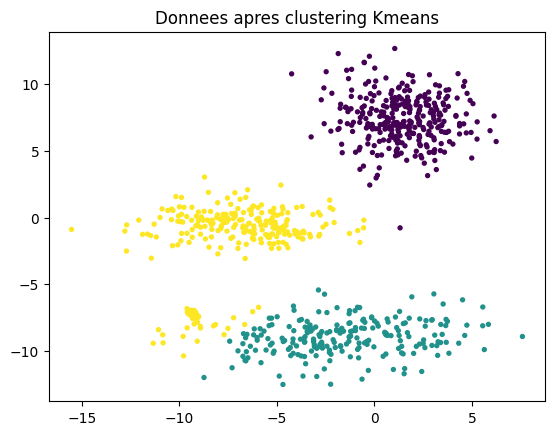

nb clusters = 3 , nb iter = 3 , runtime = 234.65 ms
Silhouette score : 0.5936466818932
Davies_bouldin score : 0.6901945937772455
calinski_harabasz score : 2116.7384484289246


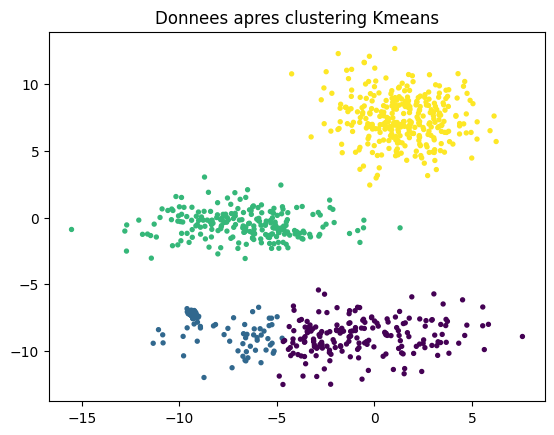

nb clusters = 4 , nb iter = 5 , runtime = 110.0 ms
Silhouette score : 0.6410098765494229
Davies_bouldin score : 0.49338851730063016
calinski_harabasz score : 2775.6685110655926


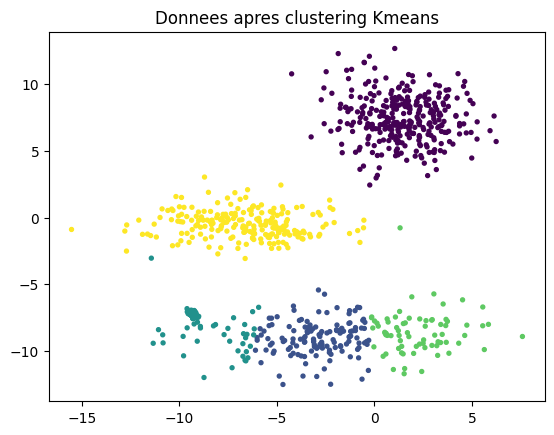

nb clusters = 5 , nb iter = 6 , runtime = 79.69 ms
Silhouette score : 0.624660192252783
Davies_bouldin score : 0.553878009916841
calinski_harabasz score : 2586.835137365194


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
from sklearn import metrics
#
# Les donnees sont dans datanp ( 2 dimensions )
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#
print("Appel KMeans pour une valeur fixee de k ")

for k in range(2, 6):
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='random', random_state=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
    print("Silhouette score :", silhouette_score)
    davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
    print("Davies_bouldin score :", davies_bouldin_score)
    calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
    print("calinski_harabasz score :", calinski_harabasz_score)


 Dendrogramme ’single’ donnees initiales 


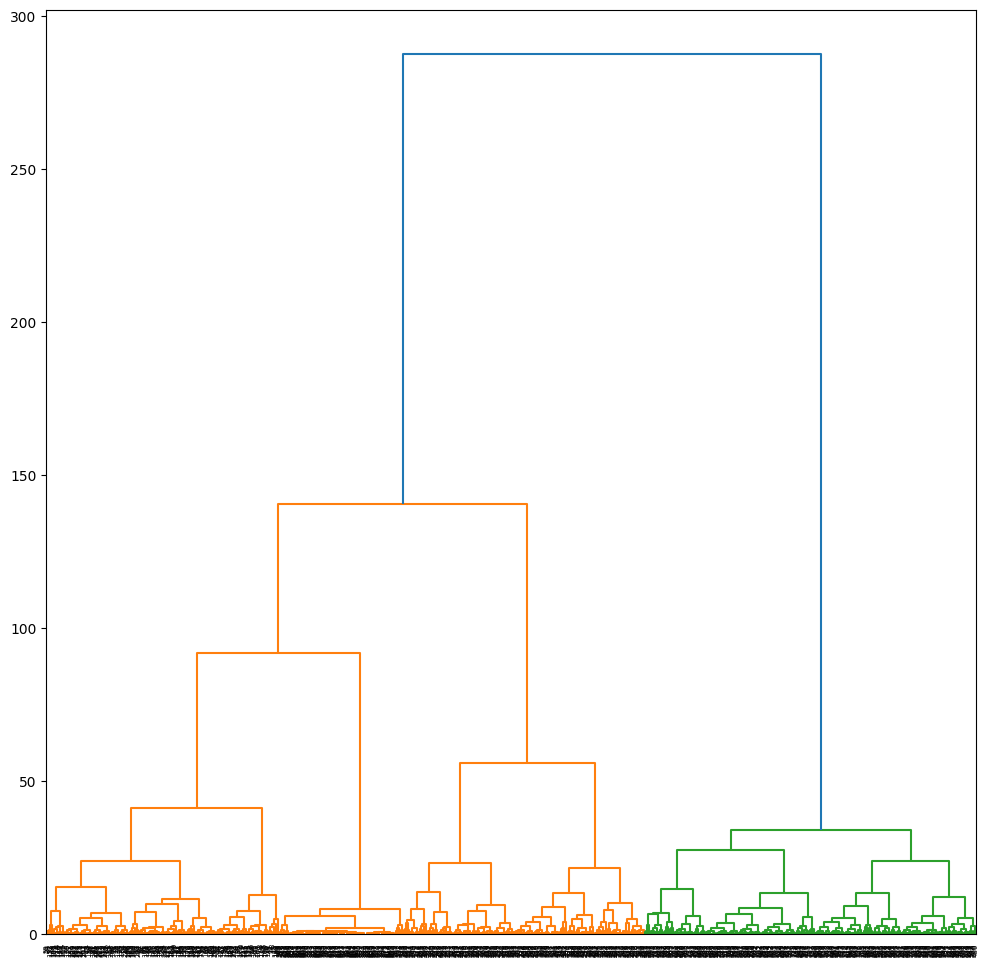

In [ ]:
import scipy.cluster.hierarchy as shc
# Donnees dans datanp
print ( " Dendrogramme ’single’ donnees initiales " )
linked_mat = shc.linkage(datanp, 'ward')
plt.figure(figsize=(12, 12))
shc.dendrogram(linked_mat,
                orientation = 'top',
                distance_sort = 'descending',
                show_leaf_counts = False )
plt.show()

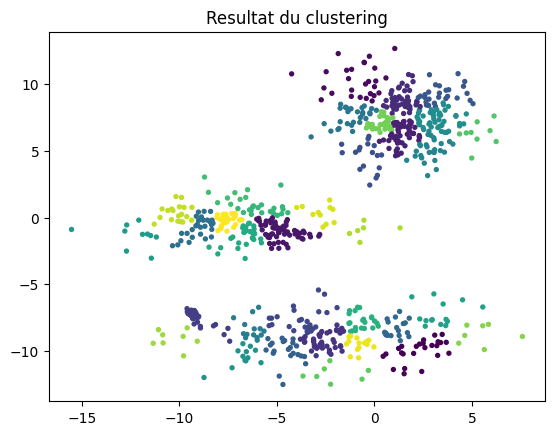

 nb clusters =  34  , nb feuilles =  876  runtime =  50.21  ms 


In [ ]:
# set distance_threshold ( 0 ensures we compute the full tree )
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold=7,
                                        linkage='ward', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Resultat du clustering")
plt.show()
print(" nb clusters = ", k, " , nb feuilles = ", leaves,
      " runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")

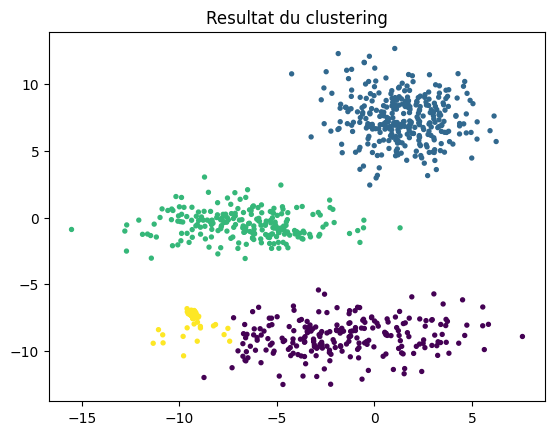

 nb clusters =  4  , nb feuilles =  876  runtime =  66.84  ms 
nb clusters = 4 , nb iter = 6 , runtime = 66.84 ms
Silhouette score : 0.625888956682714
Davies_bouldin score : 0.47932499174782534
calinski_harabasz score : 2508.235296590287


In [ ]:

# set the number of clusters
k = 4
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Resultat du clustering")
plt.show()
print(" nb clusters = ", k, " , nb feuilles = ", leaves,
      " runtime = ", round((tps2 - tps1) * 1000, 2), " ms ")

print("nb clusters =", k, ", nb iter =", iteration, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
silhouette_score = metrics.silhouette_score(datanp, labels, metric='euclidean')
print("Silhouette score :", silhouette_score)
davies_bouldin_score = metrics.davies_bouldin_score(datanp, labels)
print("Davies_bouldin score :", davies_bouldin_score)
calinski_harabasz_score = metrics.calinski_harabasz_score(datanp, labels)
print("calinski_harabasz score :", calinski_harabasz_score)